# A2DI - TP°1
## Exercice n°1 : k-ppv

Rappel de l'algorithme des k plus proches voisins :
* On part d’ensemble d’apprentissage D constitués de n exemples associés à une classe : (x i , c i ) i=1 .
* Les exemples x i appartiennent à l’espace d’attributs X.
* Un attribut est une dimension de X.
* Les classes c i appartiennent à un ensemble noté C.
* Un nouvel exemple ”non-vu“ précedemment arrive : x 0 .

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import time

iris = datasets.load_iris()
X = iris.data
y = iris.target

N = len(iris.data)
prct = 0.5

In [2]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
print(len(iris['data']))
print(iris['target_names'])
print(iris['feature_names'])

150
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


2.
Nombre d'exemples = 150
Nombre de classes = 3 (50 de chaque)
d = 4 attributs
Attributs : sepal length in cm - sepal width in cm - petal length in cm - petal width in cm

In [4]:
#X_train, X_test, y_train, y_test = X,y,[],[]
def split_data(X,y, train_size, test_size):
    """
    Split la data en 2 autres data (de taille train_size et test_size) de manière avoir un nombre à peu près identique de x de chaque catégorie.
    """
    c = np.c_[X.reshape(N, -1), y.reshape(N, -1)]
    X2 = c[:, :X.size//N].reshape(X.shape)
    y2 = c[:, X.size//N:].reshape(y.shape)
    np.random.shuffle(c)

    assert(train_size + test_size == N)
    # Pour sélectionner un pourcentage équilibré des différents représentants pour l'ensemble de test.
    D_train = np.empty([train_size,4])
    y_train = np.empty([train_size],dtype=np.int64)
    D_test = np.empty([test_size,4])
    y_test = np.empty([test_size], dtype=np.int64)
    cpt = [0,0,0]
    i1, i2 = 0,0

    for i in range(N):
        toadd = y2[i]
        ind = cpt[int(toadd)]
        if (ind < (test_size//3)):
            try: # ajout pour la Q7
                D_test[i1] = (X2[i])
                y_test[i1] = y2[i]
                i1 += 1
                cpt[int(toadd)] += 1
            except:
                D_train[i2] = (X2[i])
                y_train[i2] = y2[i]
                i2 += 1
        else:
            try: # ajout pour la Q7
                D_train[i2] = (X2[i])
                y_train[i2] = y2[i]
                i2 += 1
            except:
                D_test[i1] = (X2[i])
                y_test[i1] = y2[i]
                i1 += 1
    return D_train, y_train, D_test, y_test

D_train, y_train, D_test, y_test = split_data(X,y, 75,75)

In [5]:
# numpy.argsort : renvoie l'ordre des indices du tableau pour le trier

# Pour le vote
# numpy.bincount : compte le nombre d'occurences de chaque entier d'un tableau
# numpy.argmax : Returns the indices of the maximum values along an axis.

def d_euclide(a, b):
    return np.linalg.norm(a-b)
        

def kkpv(x_e, D_train, y_train, k):
    fct = lambda x: d_euclide(x_e, x)
    vois = np.array(list(map(fct, D_train)))
    vois = np.argsort(vois)[0:k]
    fct2 = lambda x : y_train[x]
    vote = np.array(list(map(fct2, vois)))
    y_e = np.argmax(np.bincount(vote))
    return y_e

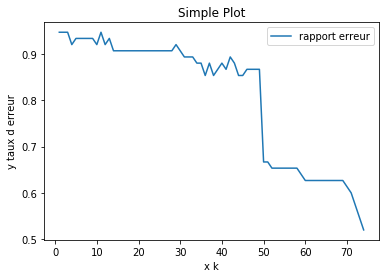

In [7]:
error = []
for k in range(1,75):
    rapp = 0
    for i,x_test in enumerate(D_test):
        rapp += 1 if (kkpv(x_test,D_train, y_train, k) == y_test[i]) else 0
        
    error.append(rapp/75)
        #print(kkpv(x_test,5), y_test[i])
    
plt.plot(list(range(1,75)), error, label='rapport erreur')

plt.xlabel('x k')
plt.ylabel('y taux d erreur')

plt.title("Simple Plot")

plt.legend()

plt.show()

In [8]:
def average(goods):
    return sum(goods)/len(goods)

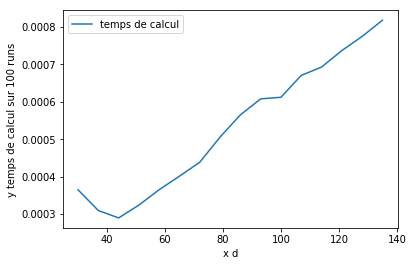

In [10]:
goods= []
for d in range(30,142,7):
    goods_inter = []
    D_train, y_train, D_test, y_test = split_data(X,y, d, N-d)
    for bl in range(100):
        be_t = time.time()
        kkpv(x_test,D_train, y_train, 17)
        aft_t = time.time()
        goods_inter.append(aft_t-be_t) # une expérience
        
    goods.append(average(goods_inter)) # moyenne des 100 expériences
   
# plot
plt.plot(list(range(30,142,7)), goods, label='temps de calcul')

plt.xlabel('x d')
plt.ylabel('y temps de calcul sur 100 runs')

plt.legend()

plt.show()

## Exercice n°2 : perceptron

In [11]:
N = 80

def init_points(d):

    pts = np.random.random_sample([100,d])
    y = np.empty([100],dtype=np.int64)
    for i, pt in enumerate(pts): 
        if (((-1/2)*pt[0]) + 0.75 <= pt[1]):
            y[i] = +1
        else :
            y[i] = -1
    return pts,y

In [12]:
pts,y = init_points(2)

In [13]:
D_train = pts[0:N]
y_train = y[0:N]
D_test = pts[N::]
y_test = y[N::]

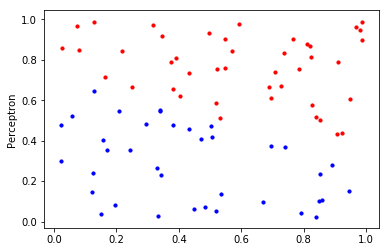

In [14]:
plt.ylabel("Perceptron")
x1 = [None] * N
y1 = [None] * N
x2 = [None] * N
y2 = [None] * N

for i in range(N):
    if(y_train[i]>=0):
        x1[i] = D_train[i][0]
        y1[i] = D_train[i][1]
    else:
        x2[i] = D_train[i][0]
        y2[i] = D_train[i][1]
        
plt.scatter(x1,y1,s=10, c="red")
plt.scatter(x2,y2,s=10, c="blue")
plt.show()

In [15]:
def p_train(X, Y, n):
    w = np.zeros(len(X[0])+1)
    X2 = np.insert(X, len(X[0]), 1, axis = 1)

    for t in range(n):
        for i, x in enumerate(X2):
            y = np.sign(np.dot(w, x))
            if (y != Y[i]) :
                w += x*Y[i]
    return w

In [16]:
w = p_train(D_train, y_train, 30)

In [17]:
w

array([ 1.3512767 ,  2.53640523, -2.        ])

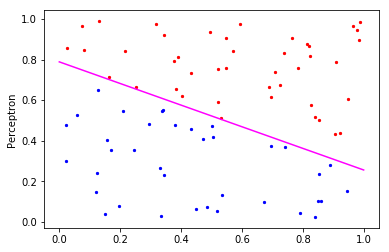

In [18]:
plt.ylabel("Perceptron")
x1 = [None] * N
y1 = [None] * N
x2 = [None] * N
y2 = [None] * N

for i in range(N):
    if(y_train[i]>=0):
        x1[i] = D_train[i][0]
        y1[i] = D_train[i][1]
    else:
        x2[i] = D_train[i][0]
        y2[i] = D_train[i][1]
        
plt.scatter(x1,y1,s=5, c="red")
plt.scatter(x2,y2,s=5, c="blue")
arr = np.linspace(0, 1, 1000)
formula = lambda x : -((w[0] * x + w[2])/w[1])
plt.plot(arr, formula(arr), c="magenta")
plt.show()

In [19]:
def predict(x, w):
    x = np.insert(x, len(x), 1)
    return np.sign(np.dot(w, x))

In [20]:
predict(D_test[0], w)

-1.0

In [21]:
def p_test(X, Y, w):
    good = 0
    for i, x_test in enumerate(X):
        if (Y[i] == predict(x_test, w)):
            good += 1
    return good / len(X)

In [22]:
p_test(D_test, y_test, w)

1.0

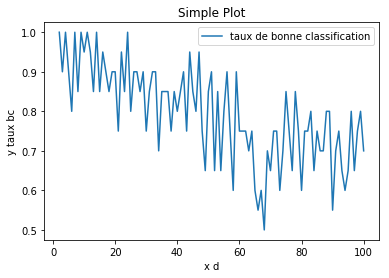

In [23]:
goods= []
for d in range(2,101):
    pts,y = init_points(d)
    D_train = pts[0:N]
    y_train = y[0:N]
    D_test = pts[N::]
    y_test = y[N::]
    w = p_train(D_train, y_train, 30)
    goods.append(p_test(D_test, y_test, w))
    
plt.plot(list(range(2,101)), goods, label='taux de bonne classification')

plt.xlabel('x d')
plt.ylabel('y taux bc')

plt.title("Simple Plot")

plt.legend()

plt.show()

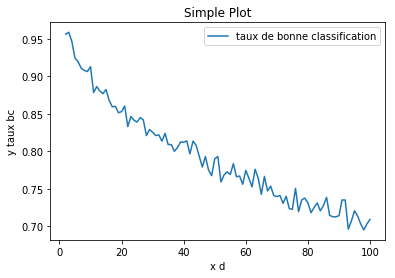

In [24]:
goods= []
for d in range(2,101):
    goods_inter = []
    for y in range(100):
        pts,y = init_points(d)
        D_train = pts[0:N]
        y_train = y[0:N]
        D_test = pts[N::]
        y_test = y[N::]
        w = p_train(D_train, y_train, 20)
        goods_inter.append(p_test(D_test, y_test, w)) # une expérience
        
    goods.append(average(goods_inter)) # moyenne des 100 expériences
   
# plot
plt.plot(list(range(2,101)), goods, label='taux de bonne classification')

plt.xlabel('x d')
plt.ylabel('y taux bc')

plt.title("Simple Plot")

plt.legend()

plt.show()